# Handwriting Digit Classification

In [47]:
# Import necessary modules and packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Downloading the MNIST dataset once, and reusing it for later runs.

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

Total length of Data, present in training set : 60000

In [3]:
len(x_train)

60000

Total Labels of the Training data

In [4]:
len(y_train)

60000

Shape of the Training data

In [5]:
x_train.shape

(60000, 28, 28)

So, there are 60000 values present as a 28x28 matrix. With pixel values, in the range 0 to 255.

Length of Test data : 10000

In [6]:
len(x_test)

10000

Total Labels of the Test data : 10000

In [7]:
len(y_test)

10000

### Visualizing the Training Image

Image as a 28x28 matrix, with pixel values from 0-255

In [8]:
x_train[599]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Above image, after plotting using Matplotlib :

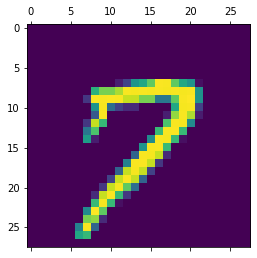

In [9]:
plt.matshow(x_train[599])

In [10]:
# Label of above data :
y_train[599]

7

In [ ]:
x_train = x_train / 255
x_test = x_test / 255


In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Converting the 2-D image values, to a flattened 1-D array.

In [12]:
# For Training Dataset
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [13]:
# For Test Dataset
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

Image Array after flattening :

In [14]:
x_test_flattened[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253,
       107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 19

## Creating the Neural Network Model using Keras

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 10.1945 - accuracy: 0.8369
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.2081 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7968 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4857 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3605 - accuracy: 0.8877


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 851us/step - loss: 5.2590 - accuracy: 0.8970


[5.259016513824463, 0.8970000147819519]

## Predicting on the given Data

In [35]:
predictions = model.predict(x_test_flattened)

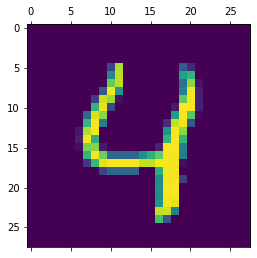

In [42]:
plt.matshow(x_test[4])

In [43]:
predictions[4]

array([1.0000000e+00, 0.0000000e+00, 9.5601666e-01, 9.9999934e-01,
       1.0000000e+00, 1.2503118e-14, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [44]:
np.argmax(predictions[4])

0

In [45]:
predicted_labels = [np.argmax(i) for i in predictions]
predicted_labels[:5]

[3, 0, 1, 0, 0]

## Plotting a Confusion Matrix

In [48]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [  34, 1099,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 623,  267,  136,    4,    1,    0,    0,    0,    0,    1],
       [ 661,  156,  101,   92,    0,    0,    0,    0,    0,    0],
       [ 363,   52,   60,  267,  240,    0,    0,    0,    0,    0],
       [ 617,   34,   39,  130,   15,   55,    2,    0,    0,    0],
       [ 499,   49,  397,    6,    5,    2,    0,    0,    0,    0],
       [ 224,  167,  154,  474,    8,    0,    0,    1,    0,    0],
       [ 493,  213,  161,   71,   10,   23,    1,    1,    1,    0],
       [ 197,   89,   92,  576,   54,    1,    0,    0,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

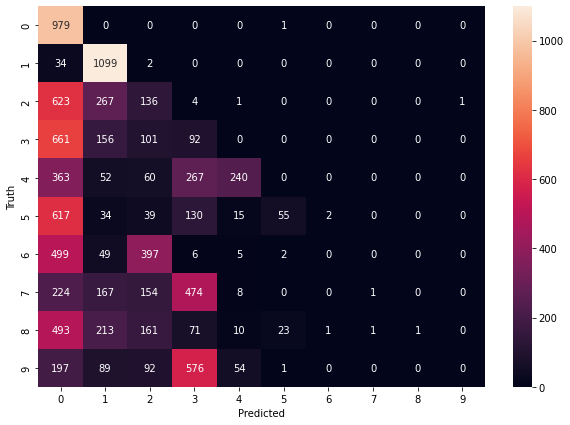

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a new hidden layer

Added 3 inner hidden layers of 100, 50, 50 units respectively

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8806 - accuracy: 0.8541
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2358 - accuracy: 0.9336
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1874 - accuracy: 0.9473
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1533 - accuracy: 0.9560
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9620


In [56]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1288 - accuracy: 0.9668


[0.12880732119083405, 0.9667999744415283]

In [57]:
predictions = model.predict(x_test_flattened)

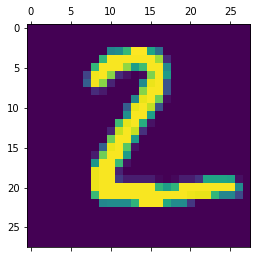

In [61]:
plt.matshow(x_test[1])

In [62]:
predictions[1]

array([0.8348218 , 0.99903136, 0.99988866, 0.9396144 , 0.2683983 ,
       0.80565345, 0.58346134, 0.9935224 , 0.8882611 , 0.00134879],
      dtype=float32)

In [63]:
np.argmax(predictions[1])

2

In [64]:
predicted_labels = [np.argmax(i) for i in predictions]
predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

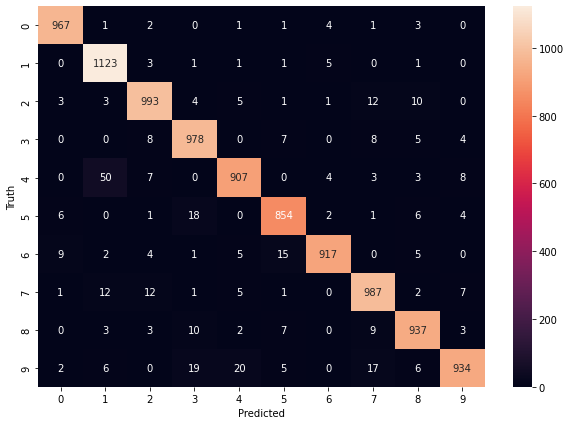

In [65]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Passing the 2-D matrix directly to input, without flattening it manually

In [67]:
# Similar to code in cell-55
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0468 - accuracy: 0.8610
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9324
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9435
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1642 - accuracy: 0.9532
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9608
